In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
incidents_timing = pd.read_csv('state_date_level.csv')
injury_data = pd.read_csv('injury_data.csv')
us_population = pd.read_csv('us_population.csv')
gun_laws = pd.read_csv('gun_laws.csv')
incidents_details = pd.read_csv('incidents_details.csv')
shooter_data = pd.read_csv('shooter_data.csv')

In [ ]:
incidents_by_state = []
related_laws_by_state = []
current_gun_laws = gun_laws.loc[gun_laws['year'] == 2019]
yearly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains("2019-")]

school_related_laws = ['college', 'collegeconcealed','elementary','opencarryh','opencarryl','opencarrypermith','opencarrypermitl','cap14', 'cap16', 'capaccess', 'capuses', 'dvro']

states = list(set(incidents_timing['State']))
states.remove("High")

for state in states:
  laws_counter = 0
  state_gun_laws = current_gun_laws.loc[current_gun_laws['state'] == state]
  incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))
  for law in school_related_laws:
    if(state_gun_laws[law].any()): laws_counter+= 1
  related_laws_by_state.append(laws_counter)

incidents_data = pd.DataFrame(
  {
    "state": states,
    "incidents": incidents_by_state,
    "relates_laws": related_laws_by_state
  })

In [ ]:
X = incidents_data['relates_laws'].values.reshape(-1,1)
y = incidents_data['incidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print(f'Coeficiente: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercepcao: {lin_regr.intercept_[0]:.2f}')
print(f'Erro quadratico medio: {mean_squared_error(y_test, y_pred):.2f}' )
print(f'R2: {r2_score(y_test, y_pred):.2f}')

Coefficient: 0.36
Intercept: 1.01
Mean squared error: 11.20
R2: -0.19


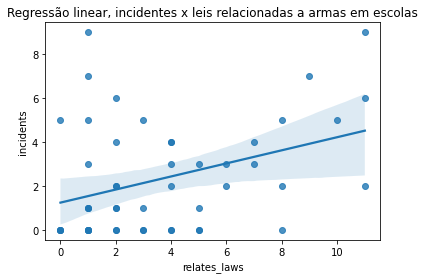

In [ ]:
sns.regplot(x='relates_laws', y='incidents', data=incidents_data)
plt.title('Regressão linear, incidentes x leis relacionadas a armas em escolas')
plt.show()